In [ ]:
\tableofcontents
% These TeX commands run at the start to remove section numbering
\renewcommand{\thesection}{\hspace*{-1.0em}}
\renewcommand{\thesubsection}{\hspace*{-1.0em}}
\renewcommand{\thesubsubsection}{\hspace*{-1.0em}}

In [17]:
%pylab inline
#%matplotlib qt
from __future__ import division # use so 1/2 = 0.5, etc.
import ssd
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [18]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

# Introducing Jupyter Notebook for Scientific Python
If you are familiar with *MATLAB* already, jumping into Jupyter notebook and the use of `Numpy` arrays is relatively easy. Understand that

* Python is a real programming language, with packages loaded to give it array mathematics (`numpy`), 2D and 3D graphics (`matplotlib`) and extended scientific math capabilities using `scipy`
* The notebook interface is very convenient for writing out problem solutions and also experimenting with concepts learned in class

**Example**
Consider Problem 1.5 from text Chapter 1. Here you are asked to plot two waves $y_1(t)$ and $y_2(t)$ over a 2ms time interval, i.e. $0 \leq t \leq 2$ ms.

The problem states that given
\begin{align}
    y_1(t) = 4\cos(2\pi \times 10^3 t)
\end{align}
suppose that $y_2(t)$ leads $y_1(t)$ by $60^\circ$. We can plot the result using commands similar to what you have learned in using MATLAB.

In [3]:
# Create t over a span of 0 to 2 ms with a time step of 0.001 ms
t = arange(0,2,.001) # an array of time samples
y1 = 4*cos(2*pi*1e3*(t*1e-3)) # a corresponding array of y1(t) values
# To lead means the phase is advanced in y2 relative to y1
y2 = 4*cos(2*pi*1e3*(t*1e-3) + 60*pi/180) # a corresponding array of y2(t) values

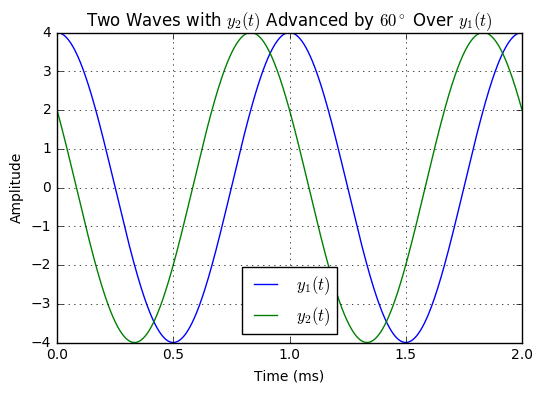

In [8]:
plot(t,y1)
plot(t,y2)
xlabel(r'Time (ms)')
ylabel(r'Amplitude')
legend((r'$y_1(t)$',r'$y_2(t)$'),loc='best')
title(r'Two Waves with $y_2(t)$ Advanced by $60^\circ$ Over $y_1(t)$')
grid();

## Electric Field Plotting
For point charges you can plot the electric field established between the charges as lines of force. The equipotential lines are perpendicular to the force lines.

In [9]:
import E_field

(-1.5, 1.5)

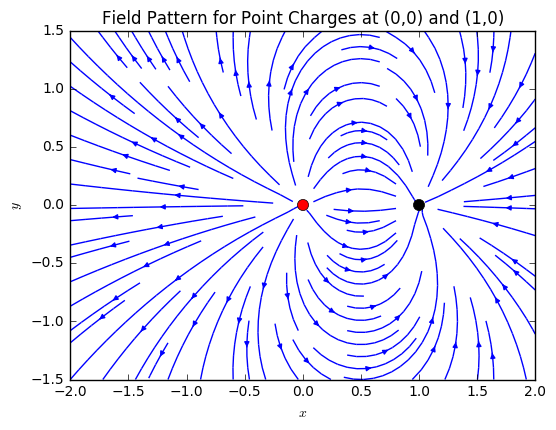

In [16]:
figure(figsize=(6, 4.5))

# charges and positions are held in a data structure or object
# q0 = 1 and q1 = -1
charges=[ E_field.charge(1, [0, 0]),E_field.charge(-1, [1, 0])]

# plot field lines
x0, x1=-2, 2
y0, y1=-1.5, 1.5
x=linspace(x0, x1, 64)
y=linspace(y0, y1, 64)
x, y=meshgrid(x, y)
Ex, Ey=E_field.E_total(x, y, charges)
streamplot(x, y, Ex, Ey, color='b')

# plot point charges
for C in charges:
    if C.q>0:
        plot(C.pos[0], C.pos[1], 'ro', ms=8*sqrt(C.q))
    if C.q<0:
        plot(C.pos[0], C.pos[1], 'ko', ms=8*sqrt(-C.q))

title(r'Field Pattern for Point Charges at (0,0) and (1,0)')
xlabel(r'$x$')
ylabel(r'$y$')
xlim(x0, x1)
ylim(y0, y1)

# Traveling Waves
The fundamental equations we deal with in this section are:
\begin{align}
    y_+(x,t) &= A\cos\left(\frac{2\pi t}{T} - \frac{2\pi x}{\lambda} + \phi_0\right)
    \quad\text{(m) in +$x$ direction} \\
    y_-(x,t) &= A\cos\left(\frac{2\pi t}{T} + \frac{2\pi x}{\lambda} + \phi_0\right)
    \quad\text{(m) in -$x$ direction}
\end{align}
where the $+x$ direction wave is denoted by $y_+$ and the $-x$ direction wave is denoted by $y_-$.

## Basic Sinusoid
The cell below plots a simple sinusoid versus time $t$.  When the cell is run GUI slider controls appear allowing the user to change the frequency and the phase shift. The math mode is
\begin{align}
    y(t) = A\cos(2\pi f_0*t +phi_0)
\end{align}
where $A = 1$ and both $f_0$ and $\phi_0$ can be varied.

**Note**: In the PDF version you do not see the GUI slider controls.

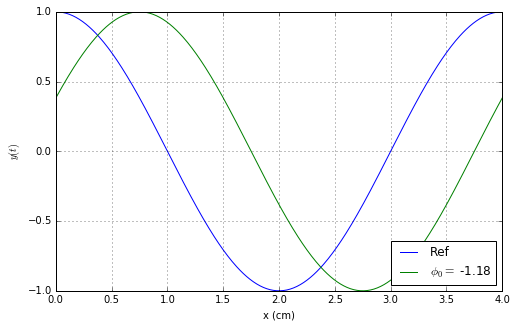

In [12]:
%matplotlib inline
# Make an interactive plot of +x and -x waves at time snapshots
from IPython.html.widgets import interact

def sinusoid_plot(f_0=1/4.,phi_0=0):
    """
    Simple plotting function for interact()
    """
    # Assume t is in s
    t = arange(0,4+.01,.01)
    A = 1;
    y0 = A*cos(2*pi*f_0*t)
    y = A*cos(2*pi*f_0*t +phi_0)
    figure(figsize=(8,5))
    plot(t,y0)
    plot(t,y)
    grid()
    xlabel(r'x (cm)')
    ylabel(r'$y(t)$');
    legend((r'Ref',r'$\phi_0=$ %1.2f' % phi_0),loc='lower right')
    
interact(sinusoid_plot,f_0 = (0.125,4,0.125), phi_0=(-pi,pi,pi/8))

# 1D Wave Exploring
The cell below plots a reference traveling wave along with a shifted wave versus $x$. When the cell is run GUI slider controls appear allowing the user to change the time slice $t$, wave direction, and the phase $\phi_0$. In the PDF version you do not see the GUI slider controls. 

<function __main__.wave_plot>

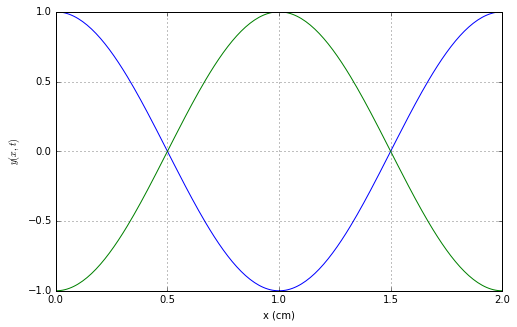

In [13]:
%matplotlib inline
# Make an interactive plot of +x and -x waves at time snapshots
from IPython.html.widgets import interact

def wave_plot(t,plus_x = 1,phi_0=0):
    """
    Simple plotting function for interact()
    """
    # Assume x is in cm
    x = arange(0,2+.01,.01)
    # T in s and lamb in cm
    A = 1; T = 4; lamb = 2
    y0 = A*cos(2*pi*0/T - 2*pi*x/lamb)
    figure(figsize=(8,5))
    plot(x,y0)
    if plus_x == 1:
        y = A*cos(2*pi*t/T - 2*pi*x/lamb + phi_0)
    else:
        y = A*cos(2*pi*t/T + 2*pi*x/lamb + phi_0)
    plot(x,y)
    grid()
    xlabel(r'x (cm)')
    ylabel(r'$y(x,t)$');
    
interact(wave_plot,t = (0,4,.25), plus_x = (0,1), phi_0=(-pi,pi,pi/8))

## A 3D Plot Showing Space and Time
The code cell below produces a 3D plot of a traveling wave as amplitude versus both $(x,t)$. Along the $x$-axis you see a single cycle of a sinusoid, in particular consider the slice for $t=0$. As $t$ increases you see that the peak of the sinusoid is moving to the right of in  the $+x$ direction (assuming a - sign in `y = A*cos(2*pi*t/T - 2*pi*x/lamb)`). The wave peak will move to the left $-x$ direction if the - sign is changed to a + sign.

The first line in the cell is commented out, but if it is uncommented the cell is run, the 3D view can be manipulated. It might be that you have to restart to Python kernel.

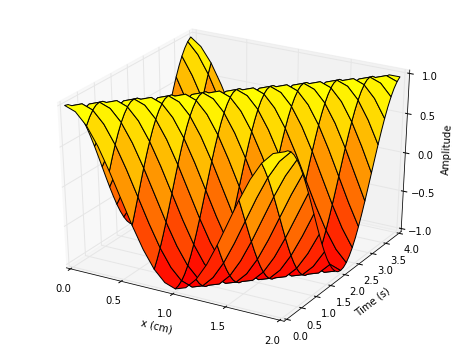

In [16]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
A = 1; T = 4; lamb = 2
t, x = mgrid[0:4:0.1, 0:2+.1:0.1]
y = A*cos(2*pi*t/T - 2*pi*x/lamb)

surf = ax.plot_surface(x, t, y, cmap='autumn', cstride=2, rstride=2)
ax.set_xlabel("x (cm)")
ax.set_ylabel("Time (s)")
ax.set_zlabel("Amplitude")
ax.set_zlim(-1, 1)

plt.show()

# Complex Arithemtic
Consider the helper function below for use in numerical calculation based problems:

In [19]:
def cpx_fmt(z,mode1='rect',mode2='f',mode3='deg',d1=2,d2=4):
    """
    Helper function for printing formatted complex numbers as %d1.d2f and
    %d1.d2e. The function returns a string that can be displayed using print()
    
    s_out = cpx_fmt(z,mode1='rect',mode2='f',d1=2,d2=4)
    
    mode1 = 'rect' or 'polar' form
    mode2 = 'f' for floating or 'e' for exponential
    mode3 = 'deg' or 'rad' for use in the polar display
    
    Mark Wickert January 2016
    """
    if mode1 == 'rect':
        if mode2 == 'f':
            mt = 'f'
        else:
            mt = 'e'
        if z.imag >= 0:
            s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' + j%'+str(d1)+'.'+str(d2)+mt 
            s_out = s_o % (z.real,z.imag)
        else:
            s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' - j%'+str(d1)+'.'+str(d2)+mt
            s_out = s_o % (z.real,abs(z.imag))
    else: # polar format otherwise
        if mode2 == 'f':
            mt = 'f'      
        else:
            mt = 'e'
        s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' /_%'+str(d1)+'.'+str(d2)+mt
        if mode3 == 'deg':
            s_o += ' (deg)'
            s_out = s_o % (abs(z),angle(z)*180/pi)
        else:
            s_o += ' (rad)'
            s_out = s_o % (abs(z),angle(z))            
    return s_out

In [25]:
z1 = 6-11j
z2 = 5+17j

In [28]:
print('z1+z2 = ' + cpx_fmt(z1+z2,'rect','f','deg',3,2))
print('z1+z2 = ' + cpx_fmt(z1+z2,'polar','f','deg',3,2))
print('z1+z2 = ' + cpx_fmt(z1+z2,'polar','f','rad',3,2))
print('z1-z2 = ' + cpx_fmt(z1-z2,'rect','f','deg',3,3))
print('z1-z2 = ' + cpx_fmt(z1-z2,'polar','f','deg',3,3))
print('z1-z2 = ' + cpx_fmt(z1-z2,'polar','f','rad',3,3))
print('z1*z2 = ' + cpx_fmt(z1*z2,'rect','f','deg',3,3))
print('z1*z2 = ' + cpx_fmt(z1*z2,'polar','f','deg',3,3))
print('z1*z2 = ' + cpx_fmt(z1*z2,'polar','f','rad',3,3))
print('z1/z2 = ' + cpx_fmt(z1/z2,'rect','e','deg',3,3))
print('z1/z2 = ' + cpx_fmt(z1/z2,'polar','e','deg',3,3))
print('z1/z2 = ' + cpx_fmt(z1/z2,'polar','e','rad',3,3))

z1+z2 = 11.00 + j6.00
z1+z2 = 12.53 /_28.61 (deg)
z1+z2 = 12.53 /_0.50 (rad)
z1-z2 = 1.000 - j28.000
z1-z2 = 28.018 /_-87.955 (deg)
z1-z2 = 28.018 /_-1.535 (rad)
z1*z2 = 217.000 + j47.000
z1*z2 = 222.032 /_12.221 (deg)
z1*z2 = 222.032 /_0.213 (rad)
z1/z2 = -5.000e-01 - j5.000e-01
z1/z2 = 7.071e-01 /_-1.350e+02 (deg)
z1/z2 = 7.071e-01 /_-2.356e+00 (rad)


# Phasor and *s*-Domain Analysis

In [46]:
# Constants
f = 2e3 # Hz
Vs = 5*exp(1j*pi/4) # Input phasor voltage
R = 1000 # ohms
C = 500e-9 # F
# Transfer functions
s = 1j*2*pi*f
H_I = s*C/(1 + s*R*C) # Vs to I
print('H_I(w) = ' + cpx_fmt(H_I,'polar','e','deg',1,2))
H_Vo = 1/(1 + s*R*C) # Vs to Vo
print('H_Vo(w) = ' + cpx_fmt(H_Vo,'polar','e','deg',1,2))
# Phasor quantities
I = Vs*H_I # Loop current phasor
print('********************************************')
print('I(phasor) = ' + cpx_fmt(I,'polar','e','deg',1,2))
Vo = Vs*H_Vo # Output voltage phasor
print('Vo(phasor) = ' + cpx_fmt(Vo,'polar','e','deg',1,2))

H_I(w) = 9.88e-04 /_9.04e+00 (deg)
H_Vo(w) = 1.57e-01 /_-8.10e+01 (deg)
********************************************
I(phasor) = 4.94e-03 /_5.40e+01 (deg)
Vo(phasor) = 7.86e-01 /_-3.60e+01 (deg)


In [49]:
# LTspice check dB to number
print('|Vo| = %1.2e V' % (10**(-2.093/20),))

|Vo| = 7.86e-01 V


In [50]:
# LTspice check dB to number
print('|I| = %1.2e V' % (10**(-46.129/20),))

|I| = 4.94e-03 V
